[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NNDesignDeepLearning/NNDesignDeepLearning/blob/master/06.TensorFlowIntroChapter/Code/ChapterNotebook/TensorFlowIntroChapter.ipynb)

# Objective

This chapter provides an introduction to the TensorFlow framework for deep learning. There are different interfaces that can be used to access TensorFlow. In this chapter we begin with the simplest one. We will show how you can quickly get started to perform all aspects of the typical deep learning workflow: load and preprocess data, build a neural network, train the network and evaluate the results.


# Theory and Examples


**TensorFlow** is one of the most popular deep learning frameworks. It was originally developed by the Google Brain group starting in 2011 as DistBelief. It was further developed into TensorFlow and released as open source software in November of 2015. TensorFlow 2.0 became officially available in Sep 2019. It is written in Python and C++.

There is more than one API (Application Programming Interface) for TensorFlow. We will mainly focus on the **Keras** API in this introduction. We will cover other APIs in Chapter 11.

Keras was originally developed independently from TensorFlow. According to its developer, Fran&ccedil;ois Chollet, Keras was more of an interface than a framework. This is because Keras was originally designed to act as a frontend for some of the other frameworks. In particular, the TensorFlow, Theano and CNTK frameworks can currently be backends for Keras, and others may be implemented in the future.

Keras was developed during 2014 and 2015, as part of a research project with ONEIROS. It started as an interface to Theano (a predecessor framework to TensorFlow) that enabled the use of recurrent neural networks (RNNs) and convolution neural networks. Its first release was in March of 2015. Fran&ccedil;ois Chollet later joined Google, and in 2017 the Google TensorFlow team decided to support Keras in TensorFlow's core library. For TenorFlow 2.0, released in 2019, Keras is the central API for TensorFlow.


## Loading the Data

The first step in using any framework is to load, format and preprocess the data set. For Keras, the data can be loaded using NumPy arrays (tensors). For other APIs or frameworks the data can be conveniently converted from a NumPy array to a similar tensor format before training. In each case, the important thing to know is what each axis of the tensor represents.

For standard multilayer networks the input is a vector with `R` elements, which we often refer to as features. The training data set will have `Q` samples of the input vector. For Keras this can be stored as a `(Q, R)`, or (samples, features), tensor.  

For other types of networks the input data can be a time series. In this case, the Keras input will be a 3D tensor of the form (samples, timesteps, features). The term **samples** here indicates the number of different time series in the data set, each of which would be of length *timesteps*.

Some networks can also accommodate images, which usually have three dimensions: height, width and color. The 4D input tensors for the network have the form (samples, height, width, color). The color (also called *channel*) dimension is usually three (red, green and blue), but can be one for grayscale images or greater than three for multi-spectral images. (It is possible to have the channel axis come before the height and width axes, but channel-last is the default, and it is the format used by TensorFlow.)

It is also possible for network inputs to be a time series of images -- a video. The 5D input tensors in this case have the form (samples, timesteps, height, width, channels).

In Keras, the network outputs will also be NumPy tensors, which should match the targets. The dimensions for the targets are assigned in the same order as the input dimensions, although the shape of the target is not usually the same as the shape of the input. 

### XOR 
For simplicity, we begin by generating data for the XOR problem. This is a binary classification problem with two dimensional inputs. If the two elements of the input vector are equal, the input is from class 1, and if the two elements are different, the input is from class 2. Here we define the inputs and targets.

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical

p = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
t = np.array([0, 1, 1, 0])
t = to_categorical(t)
print(t)

2024-12-27 18:52:27.464193: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-27 18:52:27.473452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-27 18:52:27.484022: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-27 18:52:27.487182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-27 18:52:27.495428: I tensorflow/core/platform/cpu_feature_guar

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


The `to_categorical` function is convenient for creating a one hot encoding of the targets.

## Constructing the Model

The core data structure in Keras is the **model**. The model is a way to organize layers of a network. There are three ways to define a model: 1) the sequential class, 2) the functional API, and 3) the model subclass.

To use the sequential class (which is used for networks where each layer follows the previous one), you begin by creating an instance of the class, and then use the method `add` to add layers, as in the following example. Here we create a two-layer network with 10 neurons in the hidden layer and a `tanh` activation function. The network architecture is 2-10-2.

In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(10, activation='tanh', input_shape=(2,)))
model.add(layers.Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1735343548.653980 1681443 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735343548.674581 1681443 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1735343548.674703 1681443 cuda_executor.cc:1015] successf

Notice that for the first layer we need to assign the input size. For the following layers, the input size can be determined from the size of the previous layers. The final layer uses two `softmax` neurons, which determine two classes.

An **API** (Application Programming Interface) is a set of methods for communicating between software components. In this case, Keras is communicating with TensorFlow and cuda libraries. There are often several APIs that can be used. For the **Functional API**, the layers of a network are defined individually with their specific inputs and outputs. For example, the following code implements the same 2-10-2 network using the Functional API.

In [3]:
p1 = layers.Input(shape=(2,))
a1 = layers.Dense(10, activation='tanh')(p1)
a2 = layers.Dense(2, activation='softmax')(a1)
model = models.Model(inputs=p1, outputs=a2)

When you use the **model subclass** method, you create your own fully-customizable models by subclassing the `Model` class and implementing your own forward pass in the `call` method. The following code implements the same 2-10-2 network using the model subclass method.

In [4]:
class Twolayer(models.Model):
    def __init__(self):
        super(Twolayer,self).__init__()
        self.dense1 = layers.Dense(10, activation='tanh')
        self.dense2 = layers.Dense(2, activation='softmax')
    def call(self, inputs):
        x = self.dense1(inputs)
        output = self.dense2(x)
        return output

model = Twolayer()

The size of the input will not be defined until the model is trained with the `fit` command.

## Training the Network

After the data has been loaded and the network has been created, the next step is to train the network. In the following we will cover the basic training steps.

Before training a network, the model needs to be *compiled*. During compilation you assign the training algorithm and performance (loss) function. In the following example we use the Adam training algorithm and the cross entropy performance function.

In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy')

The next step is to train the network using the `fit` method. We supply the inputs and the targets and specify the number of *epochs* for training. An epoch refers to a section of the training process during which the entire training data set is used. A related term is *iteration*, which refers to the updating of the network weights and biases. The weights can be updated in three ways: 1) one sample at a time (as in the stochastic gradient descent algorithm), 2) on the full training set as a whole (batch training) or 3) on minibatches of the training set.  If full batch training is used, then the number of iterations is the same as the number of epochs. However, if minibatches are used, the number of iterations will be larger than the number of epochs. In the example below, we set the number of epochs to 5000 and the batch size to 4. Since the batch size is the same as the size of the full data set, the number of iterations will equal the number of epochs.

In [6]:
history = model.fit(p,t,epochs=5000,batch_size=4)

Epoch 1/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - loss: 0.8297
Epoch 2/5000


I0000 00:00:1735343549.617541 1681524 service.cc:146] XLA service 0x730d60006800 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1735343549.617562 1681524 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000 Laptop GPU, Compute Capability 8.6
2024-12-27 18:52:29.627829: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-27 18:52:29.670016: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902
I0000 00:00:1735343549.809000 1681524 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8271
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8245
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8219
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8194
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8169
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8145
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8121
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8097
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8074
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8051
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8029
Epoch 13/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8006
Epoch 14/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7985
Epoch 15/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7963
Epoch 16/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7943
Epoch 17/5000
1/

The returned `history` contains information about the progress of the training process. After training is complete, we can plot the progress of the loss function during training.

The `history.history` object is a dictionary that contains a history of the loss function, and `history.epoch` contains a list of the epoch numbers.

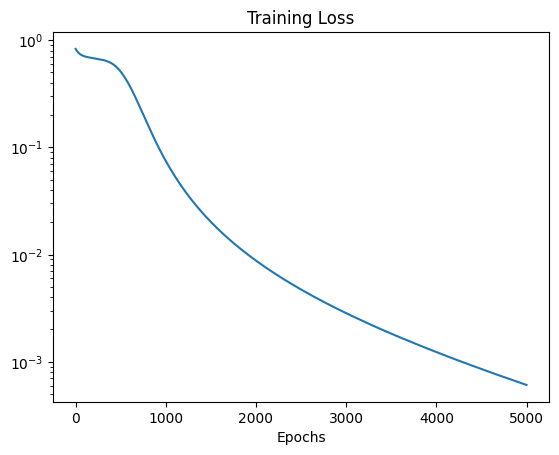

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = history.epoch
plt.semilogy(epochs, loss_values)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.show()

The `predict` method for the trained model can be used to calculate the network response to an arbitrary set of inputs. Here we apply the training inputs to the model to check the response. Is the response correct for the **XOR** problem?

In [8]:
print(model.predict(p))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[9.9953502e-01 4.6493488e-04]
 [5.0742150e-04 9.9949253e-01]
 [7.4055931e-04 9.9925941e-01]
 [9.9928391e-01 7.1610551e-04]]


Our example code does not indicate whether the program will execute on a GPU or a CPU. In TensorFlow, the program will automatically run on a GPU, if one is available. If you specifically want some code to run on a CPU, even though a GPU is available, you can manually do that using the following line: 

`with tf.device('/cpu:0')`

## Advanced Data Loading

Loading/formatting/pre-processing data is one of the most important parts of the deep learning workflow. Sometimes this process is referred to as *Exract, Transform and Load* (**ETL**). First, the data are taken from one or multiple files, which may be distributed across multiple machines. Next, the data is transformed. This process can be as simple as normalizing the data, or may involve augmenting data by rotating or scaling images, adding noise, etc. Finally, the data is loaded into the training process, often in minibatches. 

Unfortunately, this ETL process can vary significantly from one application to another, so it is difficult to cover all the options. We will give detailed examples for several specific applications in our case study chapters. However, let's take a quick look at some of the advanced data loading concepts.

For more sophisticated data loading, you can make the first argument to the `fit` method a **data generator**.  The data generator can be a Python generator, which we described in the Python chapter, or an instance of the `tensorflow.keras.utils.Sequence` class. This class of object is designed for loading data sets. It is expected to have at least two methods: `__get_item__`, which returns the next batch of data, and `__len__`, which returns the number of examples in the data set. It can also have an `on_epoch_end` method, if the data set needs to be modified in some way at each epoch (e.g., by shuffling the data). 

There are a number of reasons for using a data generator, instead of passing the entire training set into the `fit` method as a NumPy array. First, the data may be too large to fit into memory, so they may need to be loaded one minibatch at a time. Also, you may want to distribute the computation across multiple processors, which can be done conveniently using the `tensorflow.keras.utils.Sequence` class. In addition, a data loader can modify the data during training (e.g., shuffle data or augment data using transformations or noise).


### TensorFlow Dataset

TensorFlow has a very useful API for creating input pipelines: `tf.data.Dataset`. These pipelines can also be passed to the `fit` method instead of a data generator. There are many ways to use `tf.data.Dataset`, and we will cover several of these in Chapter 11 and in the Case Study chapters. To give an idea of how `tf.data.Dataset` can be used, let's consider one method from the API: `from_tensor_slices`. This method can create a Dataset from a NumPy array, or other types of data structures, like lists and dictionaries. To illustrate the operation, we'll work with the CSV file that we used in the Python chapter and lab.

First, we read in CSV file into a DataFrame.

In [10]:
import pandas as pd
data_path = '../../../05.PythonChapter/Code/ChapterNotebook/'
sample_df = pd.read_csv(data_path + 'SampleDF.csv')

Next, we extract two columns that we will use as inputs and targets.

In [11]:
P = np.array(sample_df['FVC'])
T = np.array(sample_df['Percent'])

Now we load the data into a Dataset, using `from_tensor_slices`.

In [12]:
from tensorflow.data import Dataset

In [13]:
dataset = Dataset.from_tensor_slices((P, T))

This Dataset can then be passed to the `fit` method. The Dataset is an iterable, like a data generator, so we can also access the elements with a `for` loop.

In [14]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: 2972, Target: 81.8281938325991
Features: 2253, Target: 59.622102254684
Features: 1648, Target: 68.1160618335125
Features: 969, Target: 49.07571537097999
Features: 2885, Target: 98.66621067031473


2024-12-27 18:53:38.242816: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Once the data are loaded into the Dataset, there are many useful operations that can be efficiently performed. With the `batch` method, for example, we can group the Dataset into minibatches. In the following example we group the Dataset into minibatches of size 5.

In [15]:
dataset = dataset.batch(5)

In [16]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [2972 2253 1648  969 2885], Target: [81.82819383 59.62210225 68.11606183 49.07571537 98.66621067]
Features: [3045 4791 3171 3350 2833], Target: [ 76.91724765 153.14537783  92.15880028  83.59952086  77.21029107]
Features: [4029 3410 3346 4251 1383], Target: [100.26378658  88.15925543  86.50465357 118.74301676  60.20634713]
Features: [3255 2220 1845 2756 1389], Target: [84.27402651 96.92630108 67.90577843 82.55451713 56.68924986]
Features: [2416 2917 3303 2327 4574], Target: [ 71.57246119  66.70172871 115.39267747  60.56741281 109.13342241]


2024-12-27 18:53:41.866348: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In Chapter 11 and the case study chapters we will investigate other features of the Dataset that allow us to distribute operations across multiple gpus, incorporate augmentation into the data pipeline, prefetch data, etc.